In [1]:
import yfinance as yf

bpac3 = yf.Ticker("BPAC3.SA")
df_bpac3 = bpac3.history(start="2021-01-01",end="2023-12-30")

In [2]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import root_mean_squared_error
train_size = int(len(df_bpac3) * 0.8)
train, test = df_bpac3[0:train_size], df_bpac3[train_size:len(df_bpac3)]

# p - Número de observações passadas
# d - Número de vezes que ocorreram diferenciação entre os dados passados 
# q - Janela de médias móveis
model_train = ARIMA(train['Close'], order=(10, 0, 10))
model_train_fit = model_train.fit()

test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean.to_numpy(), index=test.index)

# Calculate the mean squared error
rmse = root_mean_squared_error(test['Close'], test_forecast_series)
rmse


/home/wesley/tcc/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/wesley/tcc/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/wesley/tcc/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/wesley/tcc/venv/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

2.3628276298874997

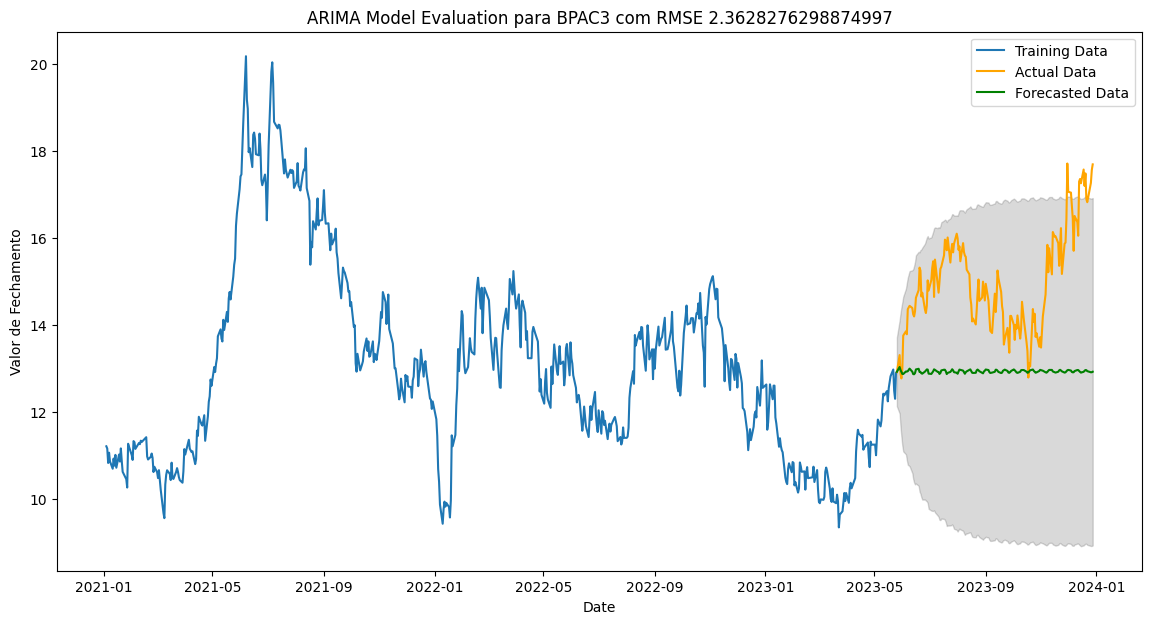

In [3]:
# Create a plot to compare the forecast with the actual test data
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.plot(train['Close'], label='Training Data')
plt.plot(test['Close'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title(f'ARIMA Model Evaluation para BPAC3 com RMSE {rmse}')
plt.xlabel('Date')
plt.ylabel('Valor de Fechamento')
plt.legend()
plt.show()

